# STUDENT PERFOMANCE INDICATIOR

# 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


# 2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.


# 3) Dataset Information
gender : sex of students -> (Male/female)
race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
lunch : having lunch before test (standard or free/reduced)
test preparation course : complete or not complete before test
math score
reading score
writing score

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Student.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

# Data Check To Perform

1) check missing values 
2) check duplicates
3) check datatypes
4) check numkber of unique value in each column
5) check statistic of dataset
6) check various categories present in varous categorical form

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# observation 
No missing values

In [10]:
df.duplicated().sum()

0

# observation 
No duplicate values in dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
# check numkber of unique value in each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [13]:
# check statistic of dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Observation

* From the above description of numerical data,all means are very close to each other- between 66 and 69
* All the standard deviation are also close- between 14.6- 15.19
* While there is a minimum of 0 for maths,other are having 17 and 10 value



In [19]:
# check various categories present in varous categorical form
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']
categorical_feature

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [20]:
# Explore more in data set
# for numerical form columns

numerical_feature=[feature for feature in df.columns if df[feature].dtype!='O']
numerical_feature

['math score', 'reading score', 'writing score']

In [22]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [23]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [24]:
# aggregate the taotal score with mean
df['total_score']=df['math score']+df['reading score']+df['writing score']
df['average_score']=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='average_score', ylabel='Count'>

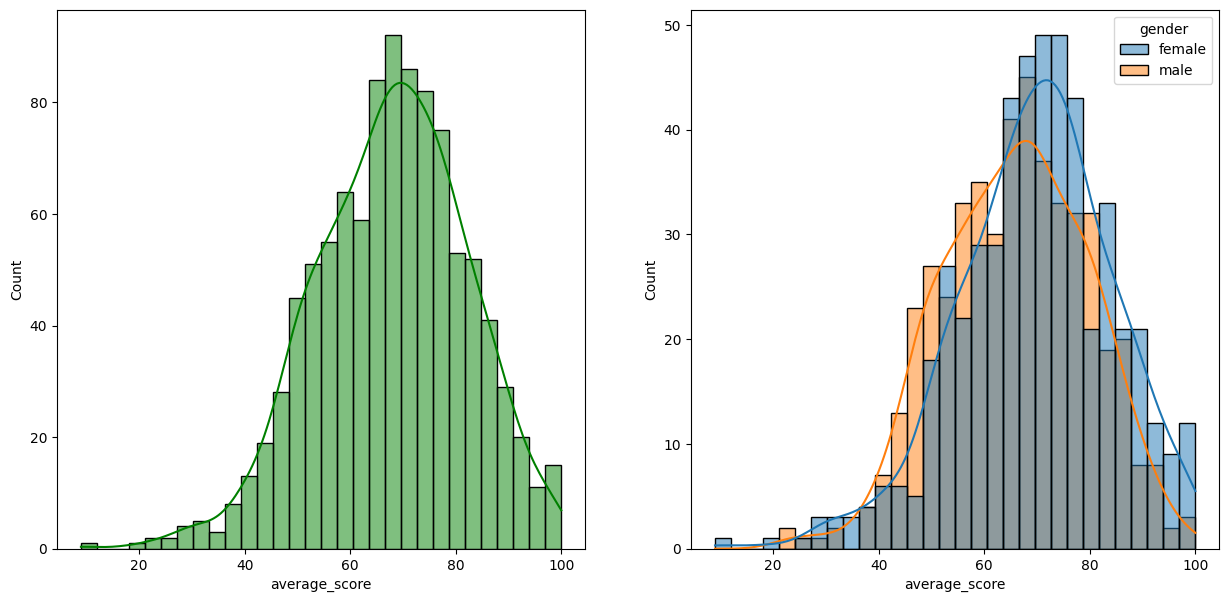

In [31]:
fig,axis=plt.subplots(1,2,figsize=(15,7))  # 1,2 means 1 row and 2 columns and figsize give size of plot
plt.subplot(121)  # it means in 1,2 row and column plot below written code in 1 column
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',bins=30,kde=True,hue='gender')

# Insights
female students perform well than male students

<Axes: xlabel='average_score', ylabel='Count'>

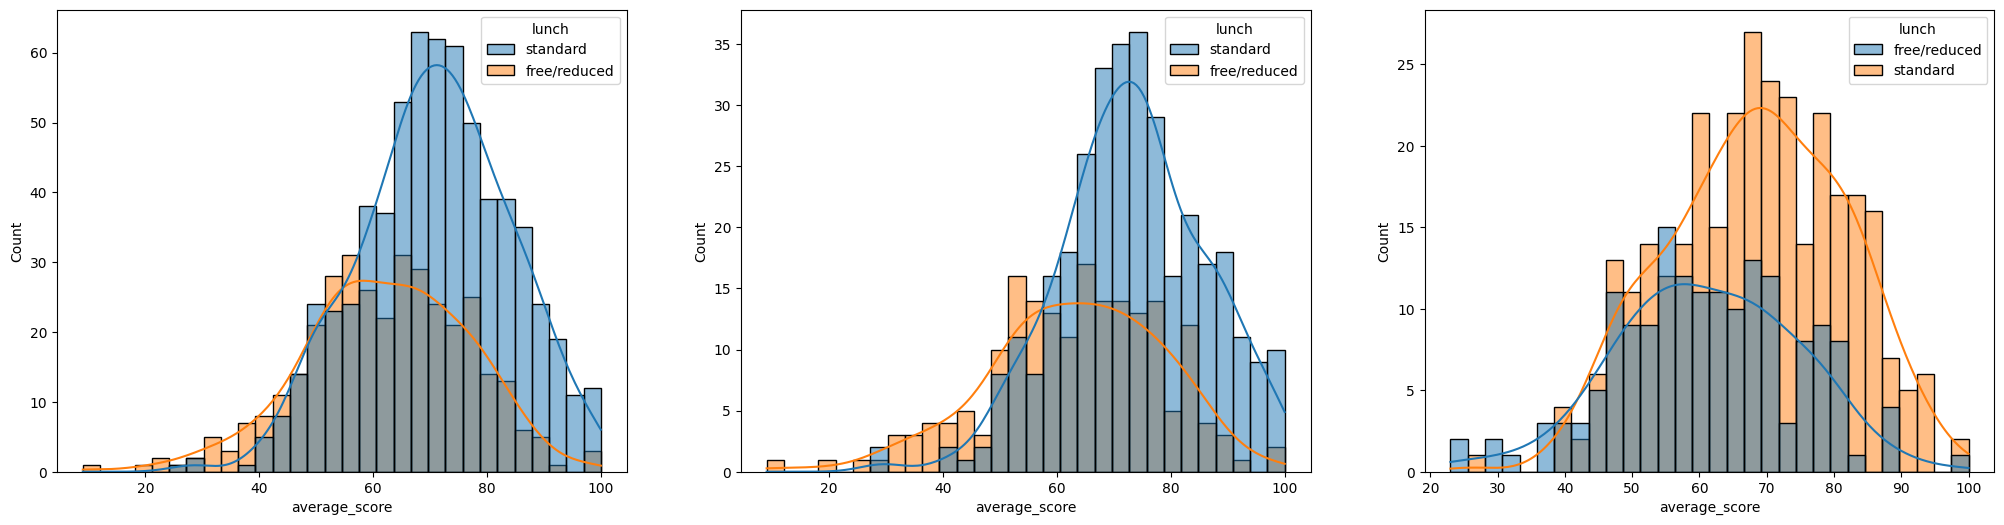

In [39]:
fig,axis=plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',bins=30,kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',bins=30,kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',bins=30,kde=True,hue='lunch')

# Insights

* Standard Lunch help students perform well in exams

* Standard lunch helps perform well in exams be it a male or female

In [40]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='average_score', ylabel='Count'>

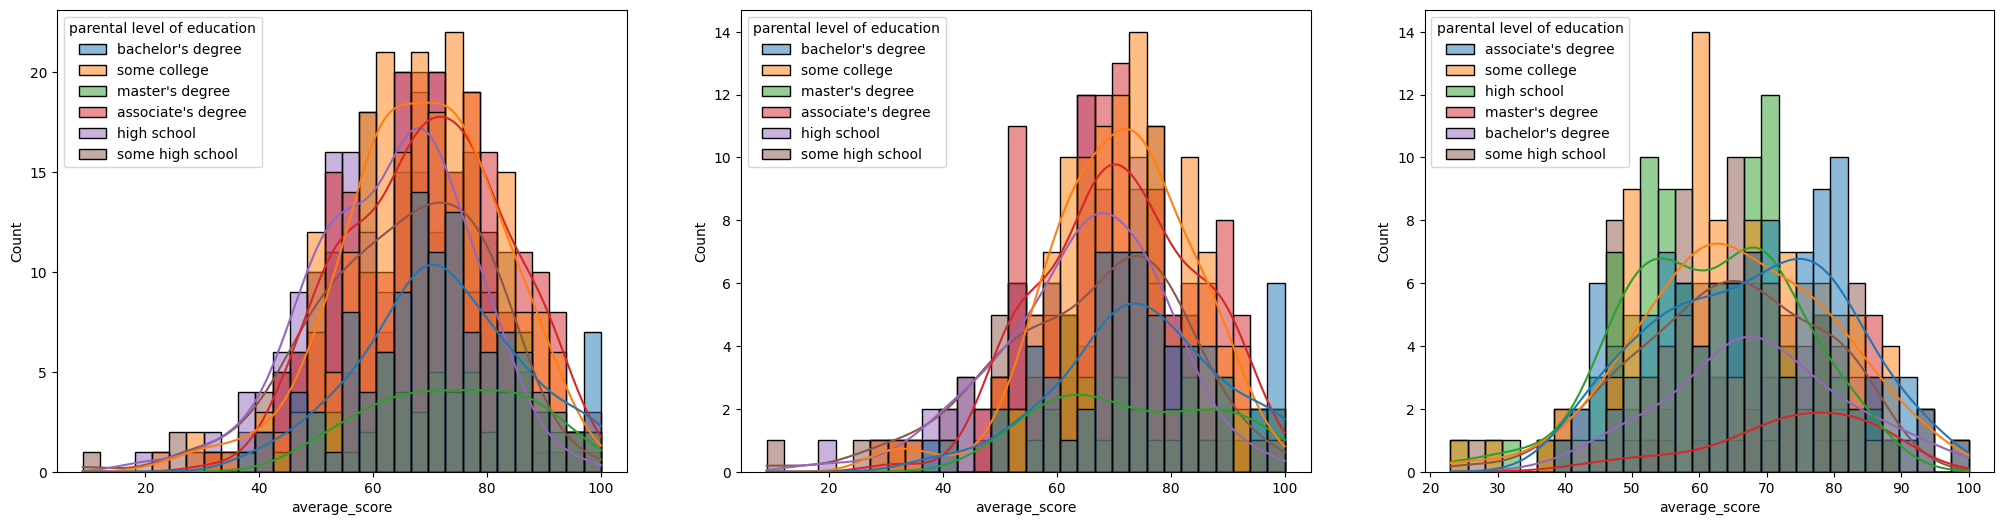

In [41]:
fig,axis=plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',bins=30,kde=True,hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',bins=30,kde=True,hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',bins=30,kde=True,hue='parental level of education')

# Insights
* In general parent's education don't help student perform well in exam.
* 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
* 2nd plot we can see there is no effect of parent's education on female students.

<Axes: xlabel='average_score', ylabel='Count'>

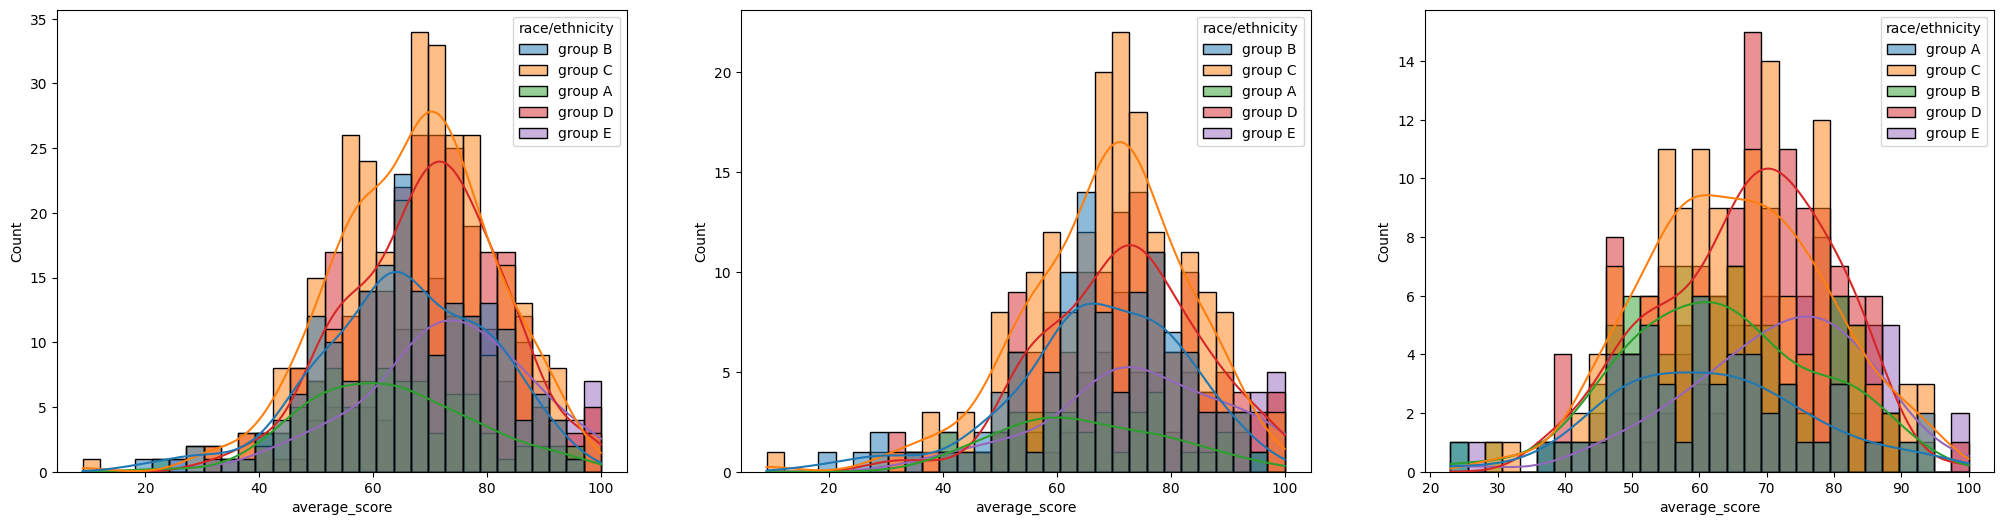

In [42]:
fig,axis=plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',bins=30,kde=True,hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',bins=30,kde=True,hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',bins=30,kde=True,hue='race/ethnicity')

# Insights
* Students of group A and group B tends to perform poorly in exam.
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

In [64]:
categorical_feature

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [72]:
# for numerical categories
df1=df
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [74]:
df1.drop(columns=['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course'],inplace=True)
df1.head()

,math score,reading score,writing score,total_score,average_score
0,72,72,74,218,72.666667
1,69,90,88,247,82.333333
2,90,95,93,278,92.666667
3,47,57,44,148,49.333333
4,76,78,75,229,76.333333


<Axes: >

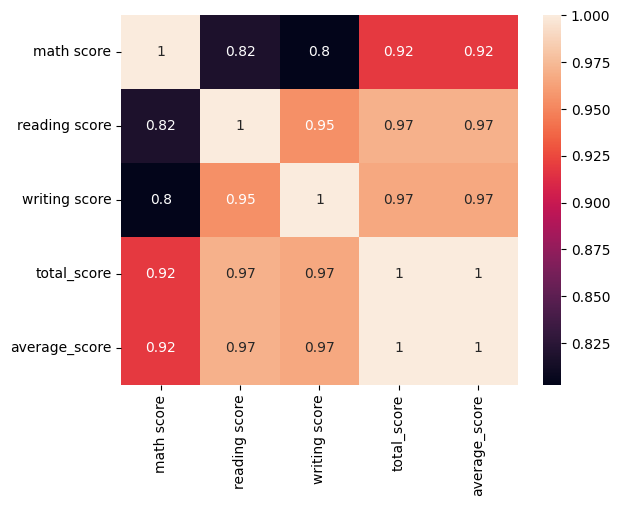

In [75]:
# now only numerical categories present in df1
sns.heatmap(df1.corr(),annot=True)